<a href="https://colab.research.google.com/github/manojmanivannan/ApacheSparkEssentials/blob/master/SparkByPluralsight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install tools

In [1]:
# !apt-get update
# !apt-get install -y openjdk-8-jdk-headless scala  > /dev/null
# !wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
# !tar xf spark-2.3.1-bin-hadoop2.7.tgz
# !pip install -q pyspark
# !pip install -q findspark
# !pip install -q yfinance geopandas

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,056 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRel

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Spark session & context
spark = SparkSession.builder.master('local[2]').getOrCreate()
sc = spark.sparkContext

In [4]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

# Download data from yahoo finance

In [5]:
import yfinance as yf
stock_list = ['AAPL']
data = yf.download(stock_list, start="2021-01-01", end="2022-01-01")
data.to_csv('apple_stock.csv')

[*********************100%***********************]  1 of 1 completed


In [6]:
apple = sc.textFile('apple_stock.csv')
apple

apple_stock.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [7]:
apple.take(5)

['Date,Open,High,Low,Close,Adj Close,Volume',
 '2021-01-04,133.52000427246094,133.61000061035156,126.76000213623047,129.41000366210938,127.87496185302734,143301900',
 '2021-01-05,128.88999938964844,131.74000549316406,128.42999267578125,131.00999450683594,129.45596313476562,97664900',
 '2021-01-06,127.72000122070312,131.0500030517578,126.37999725341797,126.5999984741211,125.09828186035156,155088000',
 '2021-01-07,128.36000061035156,131.6300048828125,127.86000061035156,130.9199981689453,129.36705017089844,109578200']

In [8]:
apple.count()

253

In [9]:
## Download data from https://drive.google.com/drive/folders/0BzquUESTxeglWElscTF0Q19UTUU?resourcekey=0-ixxx-0VdlOFfz915kofCxQ


In [37]:
data = sc.textFile('nypd_crime.csv')

In [38]:
data.take(5)

['OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1',
 '1,f070032d,09/06/1940 07:30:00 PM,Friday,Sep,6,1940,19,9,7,2010,BURGLARY,FELONY,D,66,BROOKLYN,N.Y. POLICE DEPT,987478,166141,"(40.6227027620001, -73.9883732929999)"',
 '2,c6245d4d,12/14/1968 12:20:00 AM,Saturday,Dec,14,1968,0,12,14,2008,GRAND LARCENY,FELONY,G,28,MANHATTAN,N.Y. POLICE DEPT,996470,232106,"(40.8037530600001, -73.955861904)"',
 '3,716dbc6f,10/30/1970 03:30:00 PM,Friday,Oct,30,1970,15,10,31,2008,BURGLARY,FELONY,H,84,BROOKLYN,N.Y. POLICE DEPT,986508,190249,"(40.688874254, -73.9918594329999)"',
 '4,638cd7b7,07/18/1972 11:00:00 PM,Tuesday,Jul,18,1972,23,7,19,2012,GRAND LARCENY OF MOTOR VEHICLE,FELONY,F,73,BROOKLYN,N.Y. POLICE DEPT,1005876,182440,"(40.6674141890001, -73.9220463899999)"']

In [39]:
header = data.first()
dataWoHeader = data.filter(lambda x: x != header)

In [40]:
dataWoHeader.take(5)

['1,f070032d,09/06/1940 07:30:00 PM,Friday,Sep,6,1940,19,9,7,2010,BURGLARY,FELONY,D,66,BROOKLYN,N.Y. POLICE DEPT,987478,166141,"(40.6227027620001, -73.9883732929999)"',
 '2,c6245d4d,12/14/1968 12:20:00 AM,Saturday,Dec,14,1968,0,12,14,2008,GRAND LARCENY,FELONY,G,28,MANHATTAN,N.Y. POLICE DEPT,996470,232106,"(40.8037530600001, -73.955861904)"',
 '3,716dbc6f,10/30/1970 03:30:00 PM,Friday,Oct,30,1970,15,10,31,2008,BURGLARY,FELONY,H,84,BROOKLYN,N.Y. POLICE DEPT,986508,190249,"(40.688874254, -73.9918594329999)"',
 '4,638cd7b7,07/18/1972 11:00:00 PM,Tuesday,Jul,18,1972,23,7,19,2012,GRAND LARCENY OF MOTOR VEHICLE,FELONY,F,73,BROOKLYN,N.Y. POLICE DEPT,1005876,182440,"(40.6674141890001, -73.9220463899999)"',
 '5,6e410287,05/21/1987 12:01:00 AM,Thursday,May,21,1987,0,5,28,2009,GRAND LARCENY,FELONY,K,75,BROOKLYN,N.Y. POLICE DEPT,1017958,182266,"(40.6668988440001, -73.878495425)"']

In [41]:
dataWoHeader.map(lambda x: x.split(',')).take(5)

[['1',
  'f070032d',
  '09/06/1940 07:30:00 PM',
  'Friday',
  'Sep',
  '6',
  '1940',
  '19',
  '9',
  '7',
  '2010',
  'BURGLARY',
  'FELONY',
  'D',
  '66',
  'BROOKLYN',
  'N.Y. POLICE DEPT',
  '987478',
  '166141',
  '"(40.6227027620001',
  ' -73.9883732929999)"'],
 ['2',
  'c6245d4d',
  '12/14/1968 12:20:00 AM',
  'Saturday',
  'Dec',
  '14',
  '1968',
  '0',
  '12',
  '14',
  '2008',
  'GRAND LARCENY',
  'FELONY',
  'G',
  '28',
  'MANHATTAN',
  'N.Y. POLICE DEPT',
  '996470',
  '232106',
  '"(40.8037530600001',
  ' -73.955861904)"'],
 ['3',
  '716dbc6f',
  '10/30/1970 03:30:00 PM',
  'Friday',
  'Oct',
  '30',
  '1970',
  '15',
  '10',
  '31',
  '2008',
  'BURGLARY',
  'FELONY',
  'H',
  '84',
  'BROOKLYN',
  'N.Y. POLICE DEPT',
  '986508',
  '190249',
  '"(40.688874254',
  ' -73.9918594329999)"'],
 ['4',
  '638cd7b7',
  '07/18/1972 11:00:00 PM',
  'Tuesday',
  'Jul',
  '18',
  '1972',
  '23',
  '7',
  '19',
  '2012',
  'GRAND LARCENY OF MOTOR VEHICLE',
  'FELONY',
  'F',
  '73

In [42]:
import csv
from io import StringIO
from collections import namedtuple

In [43]:
fields = header.replace(" ","_").replace("/","_").split(',')
fields

['OBJECTID',
 'Identifier',
 'Occurrence_Date',
 'Day_of_Week',
 'Occurrence_Month',
 'Occurrence_Day',
 'Occurrence_Year',
 'Occurrence_Hour',
 'CompStat_Month',
 'CompStat_Day',
 'CompStat_Year',
 'Offense',
 'Offense_Classification',
 'Sector',
 'Precinct',
 'Borough',
 'Jurisdiction',
 'XCoordinate',
 'YCoordinate',
 'Location_1']

In [44]:
Crime = namedtuple('Crime',fields) # creating a class with each field as objects/properties in the class

In [45]:
def parse(row):
  reader = csv.reader(StringIO(row))
  row = next(reader)
  return Crime(*row)

In [46]:
crime = dataWoHeader.map(parse)

In [47]:
crime.first()

Crime(OBJECTID='1', Identifier='f070032d', Occurrence_Date='09/06/1940 07:30:00 PM', Day_of_Week='Friday', Occurrence_Month='Sep', Occurrence_Day='6', Occurrence_Year='1940', Occurrence_Hour='19', CompStat_Month='9', CompStat_Day='7', CompStat_Year='2010', Offense='BURGLARY', Offense_Classification='FELONY', Sector='D', Precinct='66', Borough='BROOKLYN', Jurisdiction='N.Y. POLICE DEPT', XCoordinate='987478', YCoordinate='166141', Location_1='(40.6227027620001, -73.9883732929999)')

In [48]:
crime.first().Offense

'BURGLARY'

In [49]:
# take the offense value from each record and then count by the type of offense
crime.map(lambda x: x.Offense).countByValue()

defaultdict(int,
            {'BURGLARY': 93178,
             'GRAND LARCENY': 194631,
             'GRAND LARCENY OF MOTOR VEHICLE': 56343,
             'RAPE': 6682,
             'ROBBERY': 95126,
             'FELONY ASSAULT': 76362})

In [50]:
crime.map(lambda x: x.Occurrence_Year).countByValue()

defaultdict(int,
            {'1940': 1,
             '1968': 1,
             '1970': 1,
             '1972': 1,
             '1987': 4,
             '1990': 6,
             '1992': 5,
             '1994': 16,
             '1995': 24,
             '1996': 30,
             '1998': 72,
             '1999': 124,
             '2000': 277,
             '2001': 341,
             '2002': 366,
             '2003': 488,
             '2004': 686,
             '2005': 3256,
             '2006': 127321,
             '1910': 3,
             '1913': 4,
             '1945': 2,
             '1981': 1,
             '1985': 5,
             '1988': 3,
             '1991': 6,
             '1905': 2,
             '1971': 1,
             '1997': 38,
             '1914': 2,
             '1956': 1,
             '1989': 4,
             '1993': 16,
             '2015': 4,
             '1954': 1,
             '1982': 3,
             '1950': 1,
             '1959': 1,
             '1966': 7,
             '1980': 

In [51]:
crimesFiltered = crime.filter(lambda x: not(x.Occurrence_Year=='')).filter(lambda x: int(x.Occurrence_Year) >2005 and int(x.Occurrence_Year)<=2015)

In [52]:
crimesFiltered.map(lambda x: x.Occurrence_Year).countByValue()

defaultdict(int,
            {'2006': 127321,
             '2015': 4,
             '2007': 120069,
             '2008': 116860,
             '2009': 90921,
             '2010': 46367,
             '2011': 14924})

In [53]:
def extractCoords(location):
  location_lat = float(location[1:location.index(",")])
  location_lon = float(location[location.index(",")+1:-1])
  return (location_lat,location_lon)

In [54]:
crimesFiltered.map(lambda x: extractCoords(x.Location_1))\
              .reduce(lambda x,y:(min(x[0],y[0]),min(x[1],y[1])))

(40.112709974, -77.519206334)

In [55]:
crimesFiltered.map(lambda x: extractCoords(x.Location_1))\
              .reduce(lambda x,y:(max(x[0],y[0]),max(x[1],y[1])))

(59.5805088160001, -73.700716685)

In [56]:
# filtering records that are in the boundaries of new york city co-ordinates
crimeFinal = crimesFiltered.filter(lambda x: extractCoords(x.Location_1)[0]>=40.1 and \
                                   extractCoords(x.Location_1)[0]<= 40.95 and \
                                   extractCoords(x.Location_1)[1] >= -77.4 and \
                                   extractCoords(x.Location_1)[1] <= 73.2 )


In [57]:
crimeFinal.count()

516463

In [58]:
crimeFinal.map(lambda x: x.Occurrence_Year).countByValue()

defaultdict(int,
            {'2006': 127321,
             '2015': 4,
             '2007': 120068,
             '2008': 116860,
             '2009': 90921,
             '2010': 46365,
             '2011': 14924})

In [59]:
crimeFinal.filter(lambda x: x.Offense=='BURGLARY')\
          .map(lambda x: x.Occurrence_Year)\
          .countByValue()

defaultdict(int,
            {'2006': 23069,
             '2007': 21716,
             '2008': 20732,
             '2009': 16535,
             '2010': 8223,
             '2011': 2611})

In [75]:
b_lats = crimeFinal.filter(lambda x: x.Offense=='BURGLARY' and x.Occurrence_Year=='2008')\
                    .map(lambda x: extractCoords(x.Location_1)[0])\
                    .collect()

b_lons = crimeFinal.filter(lambda x: x.Offense=='BURGLARY' and x.Occurrence_Year=='2008')\
                    .map(lambda x: extractCoords(x.Location_1)[1])\
                    .collect()

offense_c = crimeFinal.filter(lambda x: x.Offense=='BURGLARY' and x.Occurrence_Year=='2008')\
                    .map(lambda x: x.Identifier)\
                    .collect()


In [76]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
import plotly.graph_objects as go

df = pd.DataFrame(list(zip(b_lats, b_lons,offense_c)),
               columns =['lat', 'lon','identifier'])


In [77]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    hover_name="identifier",
    zoom=9,
    height=500,

)
fig.update_geos(fitbounds="locations")
fig.update_layout(
        title = 'Crimes in NYC',
        mapbox_style="open-street-map",
        margin={"r": 0, "t": 0, "l": 0, "b": 0}
         )
fig.show()

In [78]:
# so far we saw basic rdd
# now, we will see pair rdd

In [79]:
# dataset Los Angeles
# https://archive.ics.uci.edu/ml/datasets/dodgers+loop+sensor
trafficPath = 'Dodgers.data'
gamesPath = 'Dodgers.events'

In [83]:
traffic = sc.textFile(trafficPath)
traffic.take(10)

['4/10/2005 0:00,-1',
 '4/10/2005 0:05,-1',
 '4/10/2005 0:10,-1',
 '4/10/2005 0:15,-1',
 '4/10/2005 0:20,-1',
 '4/10/2005 0:25,-1',
 '4/10/2005 0:30,-1',
 '4/10/2005 0:35,-1',
 '4/10/2005 0:40,-1',
 '4/10/2005 0:45,-1']

In [82]:
games = sc.textFile(gamesPath)
games.take(10)

['04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8�',
 '04/13/05,19:10:00,21:48:00,46514,San Francisco,W 4-1�',
 '04/15/05,19:40:00,21:48:00,51816,San Diego,W 4-0�',
 '04/16/05,19:10:00,21:52:00,54704,San Diego,W 8-3�',
 '04/17/05,13:10:00,15:31:00,53402,San Diego,W 6-0�',
 '04/25/05,19:10:00,21:33:00,36876,Arizona,L 4-2�',
 '04/26/05,19:10:00,22:00:00,44486,Arizona,L 3-2�',
 '04/27/05,19:10:00,22:17:00,54387,Arizona,L 6-3�',
 '04/29/05,19:40:00,22:01:00,40150,Colorado,W 6-3�',
 '04/30/05,19:10:00,21:45:00,54123,Colorado,W 6-2�']

In [93]:
import datetime

def parseTraffic(row):
  DATA_FORMAT='%m/%d/%Y %H:%M'
  row = row.split(',')
  row[0] = datetime.datetime.strptime(row[0],DATA_FORMAT)
  row[1] = int(row[1])
  return (row[0],row[1])

In [94]:
trafficParsed = traffic.map(parseTraffic)
trafficParsed.take(5)

[(datetime.datetime(2005, 4, 10, 0, 0), -1),
 (datetime.datetime(2005, 4, 10, 0, 5), -1),
 (datetime.datetime(2005, 4, 10, 0, 10), -1),
 (datetime.datetime(2005, 4, 10, 0, 15), -1),
 (datetime.datetime(2005, 4, 10, 0, 20), -1)]

In [134]:
dailyTrend = trafficParsed.filter(lambda x: not(x[0].date() == datetime.date(2005,4,10)))\
                          .map(lambda x: (x[0].date(),x[1]))\
                          .reduceByKey(lambda x,y: x+y)
dailyTrend.take(5)

[(datetime.date(2005, 4, 11), 5062),
 (datetime.date(2005, 4, 14), 6423),
 (datetime.date(2005, 4, 15), 6459),
 (datetime.date(2005, 4, 16), 6002),
 (datetime.date(2005, 4, 17), 5322)]

In [135]:
#sort by the traffic count and negative for descending
dailyTrend.sortBy(lambda x:-x[1]).take(10)  

[(datetime.date(2005, 7, 28), 7661),
 (datetime.date(2005, 7, 29), 7499),
 (datetime.date(2005, 8, 12), 7287),
 (datetime.date(2005, 7, 27), 7238),
 (datetime.date(2005, 9, 23), 7175),
 (datetime.date(2005, 7, 26), 7163),
 (datetime.date(2005, 5, 20), 7119),
 (datetime.date(2005, 8, 11), 7110),
 (datetime.date(2005, 9, 8), 7107),
 (datetime.date(2005, 9, 7), 7082)]

In [136]:
# Merging pair RDDs (games)
def parseGames(row):
  DATA_FORMAT='%m/%d/%y'
  row = row.split(',')
  row[0] = datetime.datetime.strptime(row[0],DATA_FORMAT).date()
  return (row[0],row[4])

In [137]:
gamesParsed = games.map(parseGames)

In [138]:
gamesParsed.take(10)

[(datetime.date(2005, 4, 12), 'San Francisco'),
 (datetime.date(2005, 4, 13), 'San Francisco'),
 (datetime.date(2005, 4, 15), 'San Diego'),
 (datetime.date(2005, 4, 16), 'San Diego'),
 (datetime.date(2005, 4, 17), 'San Diego'),
 (datetime.date(2005, 4, 25), 'Arizona'),
 (datetime.date(2005, 4, 26), 'Arizona'),
 (datetime.date(2005, 4, 27), 'Arizona'),
 (datetime.date(2005, 4, 29), 'Colorado'),
 (datetime.date(2005, 4, 30), 'Colorado')]

In [139]:
dailyTrendCombined = dailyTrend.leftOuterJoin(gamesParsed)
dailyTrendCombined.take(5)

[(datetime.date(2005, 4, 11), (5062, None)),
 (datetime.date(2005, 4, 15), (6459, 'San Diego')),
 (datetime.date(2005, 4, 17), (5322, 'San Diego')),
 (datetime.date(2005, 4, 19), (6049, None)),
 (datetime.date(2005, 4, 21), (5977, None))]

In [140]:
# convert to (date,opponent,type of day, #cars)
def checkGameDay(row):
  if row[1][1] == None:
    return (row[0],row[1][1],'Regular Day',row[1][0])
  else:
    return (row[0],row[1][1],'Game Day',row[1][0])

In [141]:
dailyTrendByGames = dailyTrendCombined.map(checkGameDay)
dailyTrendByGames.take(5)

[(datetime.date(2005, 4, 11), None, 'Regular Day', 5062),
 (datetime.date(2005, 4, 15), 'San Diego', 'Game Day', 6459),
 (datetime.date(2005, 4, 17), 'San Diego', 'Game Day', 5322),
 (datetime.date(2005, 4, 19), None, 'Regular Day', 6049),
 (datetime.date(2005, 4, 21), None, 'Regular Day', 5977)]

In [142]:
dailyTrendByGames.sortBy(lambda x: -x[3]).take(10)

[(datetime.date(2005, 7, 28), 'Cincinnati', 'Game Day', 7661),
 (datetime.date(2005, 7, 29), 'St. Louis', 'Game Day', 7499),
 (datetime.date(2005, 8, 12), 'NY Mets', 'Game Day', 7287),
 (datetime.date(2005, 7, 27), 'Cincinnati', 'Game Day', 7238),
 (datetime.date(2005, 9, 23), 'Pittsburgh', 'Game Day', 7175),
 (datetime.date(2005, 7, 26), 'Cincinnati', 'Game Day', 7163),
 (datetime.date(2005, 5, 20), 'LA Angels', 'Game Day', 7119),
 (datetime.date(2005, 8, 11), 'Philadelphia', 'Game Day', 7110),
 (datetime.date(2005, 9, 8), None, 'Regular Day', 7107),
 (datetime.date(2005, 9, 7), 'San Francisco', 'Game Day', 7082)]

In [144]:
# getting an average traffic by a key, say game day using reduceByKey (lambda x,y: (x+y)/2) is wrong

# Combine by key method
# get sum and counts separately and then take ratio

# 1. create Combiner function
# 2. merge function
# 3. merge combiner function

# combineByKey(
#   (lambda value: (value,1)),  <-- first time a key is seen initialize a tuple (value,1)
#   (lambda acc,value: (acc[0]+value, acc[1]+1)), <-- 2nd time it is seen, take the value and add it presvious and increase count
#   (lambda acc1,acc2: (acc1[0]+acc2[0],acc1[1]+acc2[1])) <-- combine more than 1 key, by values position 0 (sum) and position 1 (count)
# )



In [148]:
dailyTrendByGames.map(lambda x:(x[2],x[3]))\
                 .combineByKey(lambda value: (value,1),
                               lambda acc,value: (acc[0]+value,acc[1]+1),
                               lambda acc1,acc2: (acc1[0]+acc2[0],acc1[1]+acc2[1]))\
                 .mapValues(lambda x: x[0]/x[1])\
                 .collect()

[('Regular Day', 5472.612903225807), ('Game Day', 5948.604938271605)]

In [149]:
# Relationships and Networks
books = sc.textFile('Books.txt')
characters = sc.textFile('Characters.txt')
edges = sc.textFile('Edges.txt')

In [150]:
books.take(5)

['Vertex 6487: AA2 35',
 'Vertex 6488: M/PRM 35',
 'Vertex 6489: M/PRM 36',
 'Vertex 6490: M/PRM 37',
 'Vertex 6491: WI? 9']

In [151]:
characters.take(5)

['Vertex 1: 24-HOUR MAN/EMMANUEL',
 'Vertex 2: 3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER',
 'Vertex 3: 4-D MAN/MERCURIO',
 'Vertex 4: 8-BALL/',
 'Vertex 5: A']

In [152]:
edges.take(5)

['*Vertices 19428 6486',
 '1 "24-HOUR MAN/EMMANUEL"',
 '2 "3-D MAN/CHARLES CHAN"',
 '3 "4-D MAN/MERCURIO"',
 '4 "8-BALL/"']

In [156]:
def edgeFilter(row):
  if '*' in row or '"' in row:
    return False
  else:
    return True

edgesFiltered = edges.filter(edgeFilter)

In [157]:
edgesFiltered.take(10)

['1 6487',
 '2 6488 6489 6490 6491 6492 6493 6494 6495 6496',
 '3 6497 6498 6499 6500 6501 6502 6503 6504 6505',
 '4 6506 6507 6508',
 '5 6509 6510 6511',
 '6 6512 6513 6514 6515',
 '7 6516',
 '8 6517 6518',
 '9 6519 6520',
 '10 6521 6522 6523 6524 6525 6526 6527 6528 6529 6530 6531 6532 6533 6534 6535']

In [158]:
# Important characters
characterBookMap = edgesFiltered.map(lambda x: x.split())\
                                .map(lambda x: (x[0],x[1:]))

In [159]:
characterBookMap.take(5)

[('1', ['6487']),
 ('2',
  ['6488', '6489', '6490', '6491', '6492', '6493', '6494', '6495', '6496']),
 ('3',
  ['6497', '6498', '6499', '6500', '6501', '6502', '6503', '6504', '6505']),
 ('4', ['6506', '6507', '6508']),
 ('5', ['6509', '6510', '6511'])]

In [162]:
def charParse(row):
  row = row.split(':')
  return (row[0][7:],row[1].strip())

characterLookup = characters.map(charParse).collectAsMap()

In [165]:
# First 5 records
{k: characterLookup[k] for k in list(characterLookup)[:5]}

{'1': '24-HOUR MAN/EMMANUEL',
 '2': '3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER',
 '3': '4-D MAN/MERCURIO',
 '4': '8-BALL/',
 '5': 'A'}

In [166]:
characterStrength = characterBookMap.mapValues(lambda x:len(x))\
                                    .map(lambda x: (characterLookup[x[0]],x[1]))\
                                    .reduceByKey(lambda x,y: x+y)\
                                    .sortBy(lambda x:-x[1])

In [167]:
characterStrength.take(10)

[('SPIDER-MAN/PETER PARKER', 1625),
 ('CAPTAIN AMERICA', 1367),
 ('IRON MAN/TONY STARK', 1168),
 ('THING/BENJAMIN J. GRIMM', 990),
 ('THOR/DR. DONALD BLAKE/SIGURD JARLSON II/JAKE OLSON/LOREN OLSON', 965),
 ('HUMAN TORCH/JOHNNY STORM', 908),
 ('MR. FANTASTIC/REED RICHARDS', 875),
 ('HULK/DR. ROBERT BRUCE BANNER', 841),
 ('WOLVERINE/LOGAN', 820),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 782)]

In [169]:
# co occurrance network 
bookCharacterMap = characterBookMap.flatMapValues(lambda x: x)\
                                    .map(lambda x: (x[1],x[0]))\
                                    .reduceByKey(lambda x,y: x+','+y)\
                                    .mapValues(lambda x:x.split(','))
bookCharacterMap.take(2)

[('6490', ['2']),
 ('6493',
  ['2',
   '154',
   '859',
   '2186',
   '2399',
   '2555',
   '3035',
   '3491',
   '4228',
   '6022',
   '6148'])]

In [171]:
import itertools
cooccurenceMap = bookCharacterMap.flatMap(lambda x: list(itertools.combinations(x[1],2)))
cooccurenceMap.take(10)

[('2', '154'),
 ('2', '859'),
 ('2', '2186'),
 ('2', '2399'),
 ('2', '2555'),
 ('2', '3035'),
 ('2', '3491'),
 ('2', '4228'),
 ('2', '6022'),
 ('2', '6148')]

In [172]:
cooccurenceStrength = cooccurenceMap.map(lambda x: (x,1))\
                                    .reduceByKey(lambda x,y: x+y)
cooccurenceStrength.take(8)

[(('2', '859'), 3),
 (('2', '2399'), 3),
 (('2', '2555'), 3),
 (('2', '3035'), 4),
 (('154', '2186'), 2),
 (('154', '3491'), 2),
 (('154', '4228'), 41),
 (('154', '6022'), 2)]

In [174]:
cooccurenceEdges = cooccurenceStrength.map(lambda x: (x[0][0],x[0][1],x[1]))
cooccurenceEdges.take(7)

[('2', '859', 3),
 ('2', '2399', 3),
 ('2', '2555', 3),
 ('2', '3035', 4),
 ('154', '2186', 2),
 ('154', '3491', 2),
 ('154', '4228', 41)]

In [179]:
# Understanding and modeling relationships
sortedCooccurence = cooccurenceEdges\
                    .sortBy(lambda x:-x[2])\
                    .map(lambda x:(characterLookup[x[0]],characterLookup[x[1]],x[2]))

In [180]:
sortedCooccurence.take(10)

[('HUMAN TORCH/JOHNNY STORM', 'THING/BENJAMIN J. GRIMM', 744),
 ('HUMAN TORCH/JOHNNY STORM', 'MR. FANTASTIC/REED RICHARDS', 713),
 ('MR. FANTASTIC/REED RICHARDS', 'THING/BENJAMIN J. GRIMM', 708),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 'MR. FANTASTIC/REED RICHARDS', 701),
 ('HUMAN TORCH/JOHNNY STORM', 'INVISIBLE WOMAN/SUE STORM RICHARDS', 694),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 'THING/BENJAMIN J. GRIMM', 668),
 ('SPIDER-MAN/PETER PARKER', 'WATSON-PARKER, MARY JANE', 616),
 ('JAMESON, J. JONAH', 'SPIDER-MAN/PETER PARKER', 526),
 ('CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 446),
 ('SCARLET WITCH/WANDA MAXIMOFF', 'VISION', 422)]

In [181]:
sortedCooccurence.filter(lambda x: 'SPIDER-MAN/PETER PARKER' in x).take(10)

[('SPIDER-MAN/PETER PARKER', 'WATSON-PARKER, MARY JANE', 616),
 ('JAMESON, J. JONAH', 'SPIDER-MAN/PETER PARKER', 526),
 ('PARKER, MAY', 'SPIDER-MAN/PETER PARKER', 380),
 ('ROBERTSON, JOE', 'SPIDER-MAN/PETER PARKER', 356),
 ('LEEDS, BETTY BRANT', 'SPIDER-MAN/PETER PARKER', 249),
 ('SPIDER-MAN/PETER PARKER', 'THOMPSON, EUGENE FLASH', 240),
 ('OSBORN, HARRY', 'SPIDER-MAN/PETER PARKER', 181),
 ('HUMAN TORCH/JOHNNY STORM', 'SPIDER-MAN/PETER PARKER', 147),
 ('CAPTAIN AMERICA', 'SPIDER-MAN/PETER PARKER', 145),
 ('OSBORN, LIZ ALLAN', 'SPIDER-MAN/PETER PARKER', 138)]

In [182]:
sortedCooccurence.map(lambda x:x[2]).stats()

(count: 168267, mean: 3.386106604384635, stdev: 10.918482065185609, max: 744.0, min: 1.0)

In [185]:
sortedCooccurence.map(lambda x:int(x[2]/10)).countByValue()

defaultdict(int,
            {74: 1,
             71: 1,
             70: 2,
             69: 1,
             66: 1,
             61: 1,
             52: 1,
             44: 1,
             42: 1,
             40: 1,
             39: 1,
             38: 5,
             37: 2,
             35: 1,
             34: 2,
             33: 3,
             32: 1,
             31: 2,
             30: 7,
             29: 5,
             28: 2,
             27: 3,
             26: 8,
             25: 5,
             24: 7,
             23: 6,
             22: 5,
             21: 5,
             20: 9,
             19: 3,
             18: 17,
             17: 7,
             16: 11,
             15: 16,
             14: 19,
             13: 17,
             12: 45,
             11: 41,
             10: 44,
             9: 78,
             8: 82,
             7: 126,
             6: 162,
             5: 218,
             4: 375,
             3: 641,
             2: 1405,
             1: 5621,
      

In [186]:
import networkx as nx

In [187]:
G=nx.Graph()
edges = sortedCooccurence.map(lambda x:(x[0],x[1],{'weight':1000/x[2]})).take(50)

In [189]:
G.add_edges_from(edges)

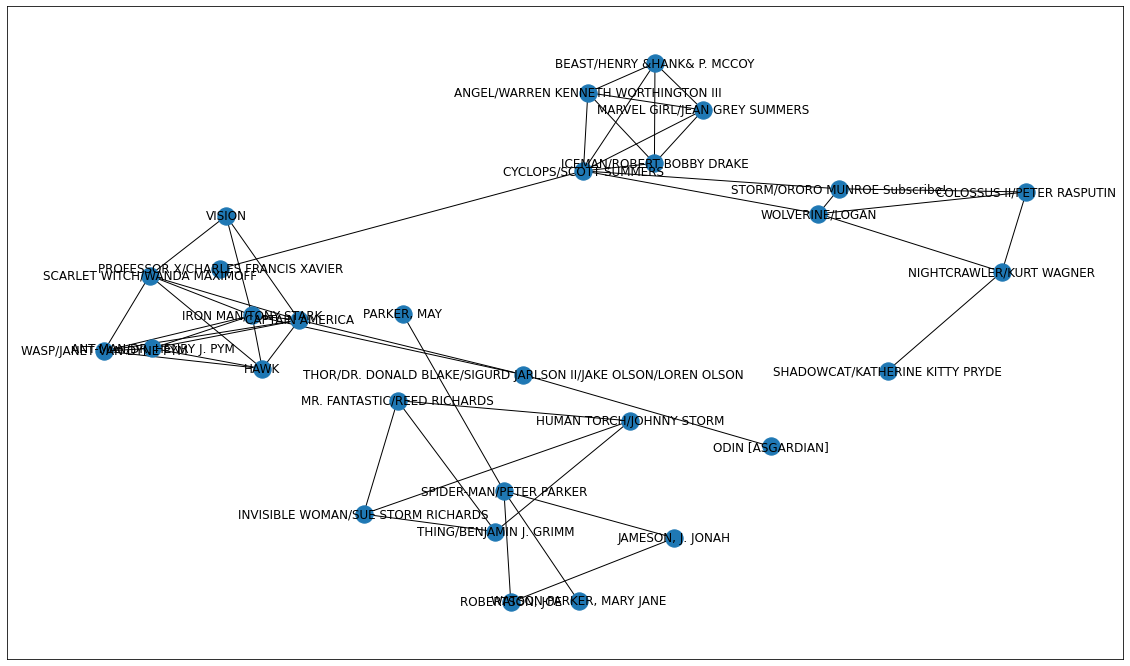

In [197]:
import matplotlib.pyplot as plt
import math
fig = plt.figure(figsize=(20,12))
nx.draw_networkx(G, pos=nx.spring_layout(G,k=5/math.sqrt(G.order())))
plt.show()